<a href="https://colab.research.google.com/github/carive47/Finances/blob/main/technical_forecasting/ETH_Case.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Libraries And Data**

In [ ]:
pip install ta

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for ta: filename=ta-0.10.2-py3-none-any.whl size=29104 sha256=07adb990fdf744d7cdbb285f74867e7ad5b511740dbb8cb27e4f84fb51699c84
  Stored in directory: /root/.cache/pip/wheels/31/31/f1/f2ff471bbc5b84a4b973698ceecdd453ae043971791adc3431
Successfully built ta


In [ ]:
pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 1.7 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0


In [ ]:
pip install matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install mplfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 71 kB 10.8 MB/s 


In [ ]:
import yfinance as yfin
import numpy as np
import pandas as pd
import ta
import matplotlib.pyplot as plt
import mplfinance as mpf
import plotly.express as px


In [ ]:
df = yfin.download('ETH-USD', start='2019-09-1', end = '2022-11-01')

[*********************100%***********************]  1 of 1 completed


#**PART I: Closing Prices Analysis**

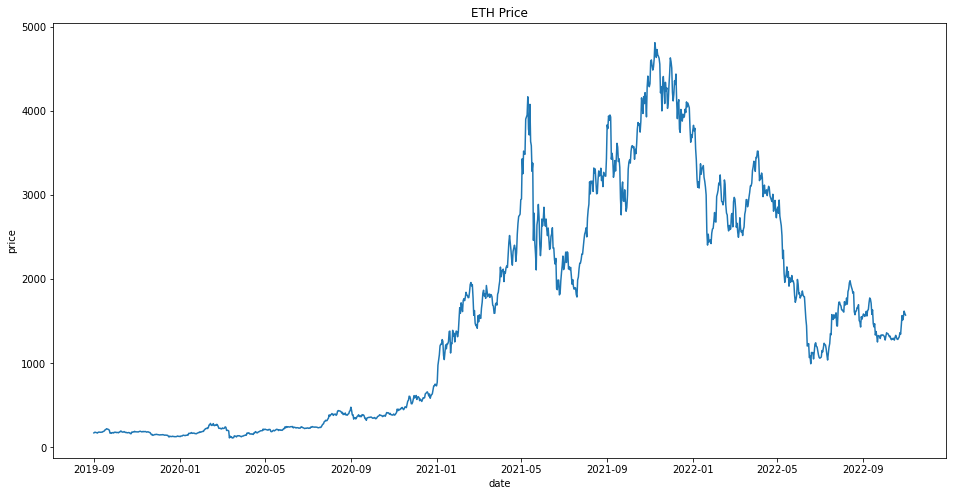

In [ ]:
# Closing Prices plot
plt.figure(figsize=(16,8))
plt.plot(df['Adj Close'], )
plt.ylabel('price')
plt.xlabel('date')
plt.title('ETH Price')
plt.show()

In [ ]:
figx = px.line(df,y='Adj Close')
figx.show()

In [ ]:
# lag of one period
df['Adj Close t-1']=df['Adj Close'].shift(1)
# Arithmetic return calculation
df['arit_return']=(df['Adj Close']-df['Adj Close t-1'])/df['Adj Close t-1']
#Logarithmic Return
df['log_return'] = np.log(df['Adj Close']) - np.log(df['Adj Close t-1'])



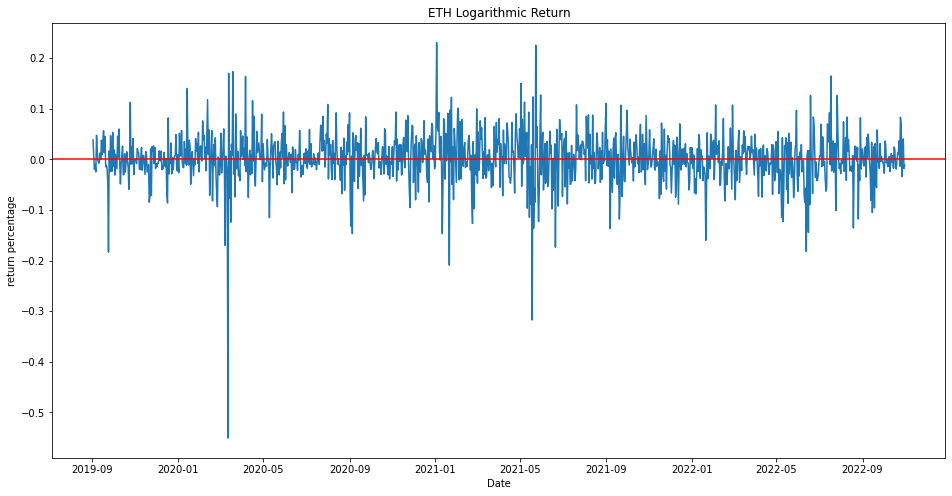

In [ ]:
# Logarithmic Return Plot
plt.figure(figsize=(16,8))
plt.plot(df['log_return'])
plt.ylabel('return percentage')
plt.xlabel('Date')
plt.title('ETH Logarithmic Return')
plt.axhline(y=0, color = 'red')
plt.show()

In [ ]:
figz = px.line(df, y='log_return')

figz.add_hline(y=0, line_width=2, line_dash="dash", line_color="red")
#figz.add_hrect(y0=-0.5, y1=, line_width=0, fillcolor="red", opacity=0.2)
figz.show()

In [ ]:
from numpy.ma.core import count
#Yearly Average of Logarithmic Return
print('Yearly Average of Logarithmic Return ')
print(df['log_return'].mean()*252)
print('Annualized daily historical volatility')
print(np.std(df['log_return'])*np.sqrt(252))


Yearly Average of Logarithmic Return 
1.0342582419921265
Annualized daily historical volatility
0.8465930452865625


#**ETH Candlestick Graph and ETH - S&P500 Comparative**

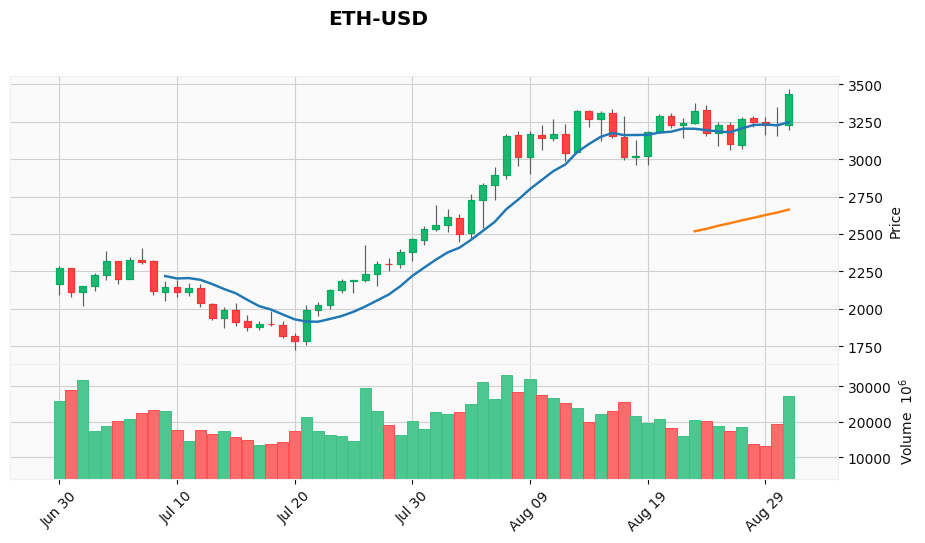

In [ ]:
# Candlestick Graph
mpf.plot(df.tail(63),
         type = 'candle',
         volume = True,
         figratio = (16,8),
         mav=(10,55),
         style = 'yahoo',
         title = 'ETH-USD')

[*********************100%***********************]  1 of 1 completed


Text(0, 0.5, 'Scaled Price to 100 usd')

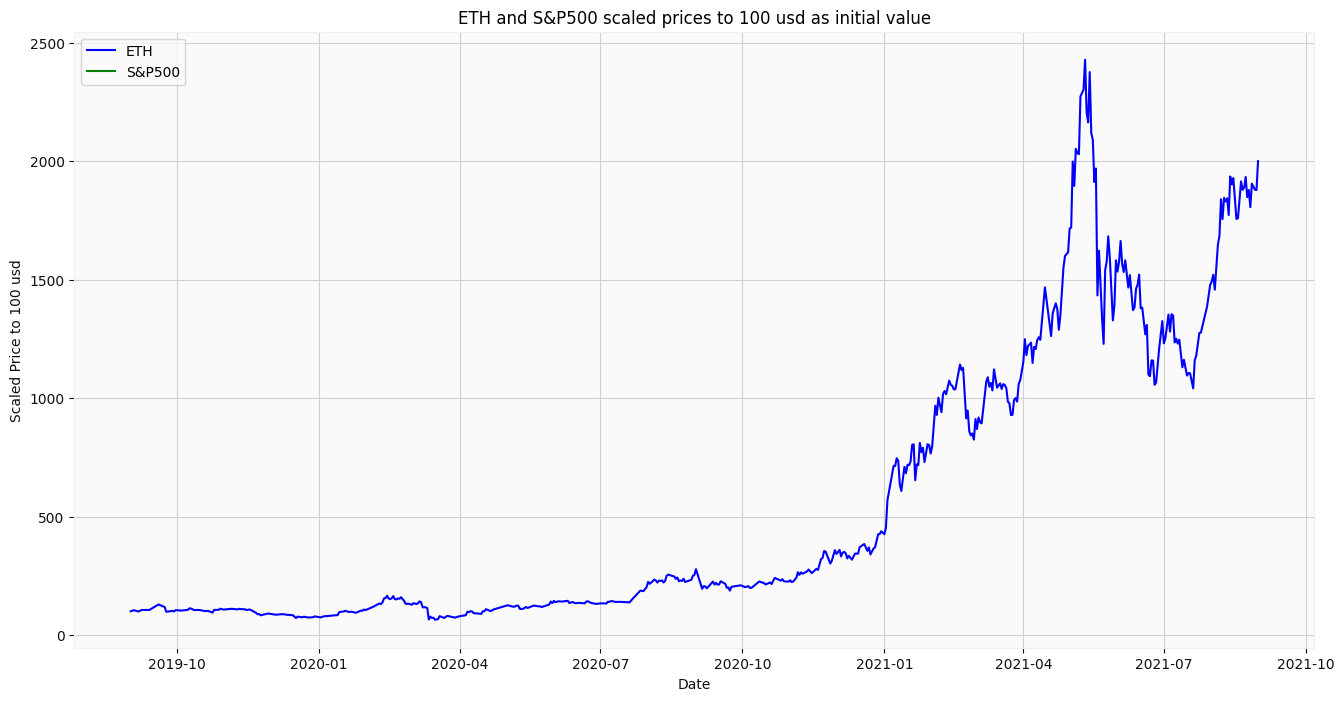

In [ ]:
# S&P500 Data
dfs= yfin.download('^GSPC', start='2019-09-01', end='2021-09-01')

# Escaling ETH and SP500 prices to 100  USD initial Value
df['E_price_100']= (100/df['Close'][0]*df['Close'])
dfs['E_price_100'] = (100/ dfs['Close'][0]*df['Close'])

# Comparing Both Scaled ETH and SP500
plt.figure(figsize=(16,8))
plt.plot(df['E_price_100'], label='ETH', color='blue')
plt.plot(dfs['E_price_100'], label='S&P500', color = 'green')
plt.title('ETH and S&P500 scaled prices to 100 usd as initial value')
plt.legend(loc='upper left')
plt.xlabel('Date')
plt.ylabel('Scaled Price to 100 usd')


#**Trading Strategies from 5 days EMA and 20 days EMA**

In [ ]:
# EMAs calculations
df['EMA_20']=ta.trend.ema_indicator(close=df['Close'],window=20)
df['EMA_5']= ta.trend.ema_indicator(close=df['Close'], window=5)

#signlas calculations
N=len(df)
signals=[0]

for i in range (1,N):

  five = df['EMA_5'][i]
  twenty = df['EMA_20'][i]
  a_five = df['EMA_5'][i-1]
  a_twenty = df['EMA_20'][i-1]

  if a_five < a_twenty and five > twenty:
    signals.append(1)
  elif a_five > a_twenty and five < twenty:
    signals.append(-1)
  else:
    signals.append(0)

df['signals'] = signals

df['buy'] = np.where(df['signals'] == 1, df['Close'], np.nan)
df['sell'] = np.where(df['signals'] == -1, df['Close'], np.nan)


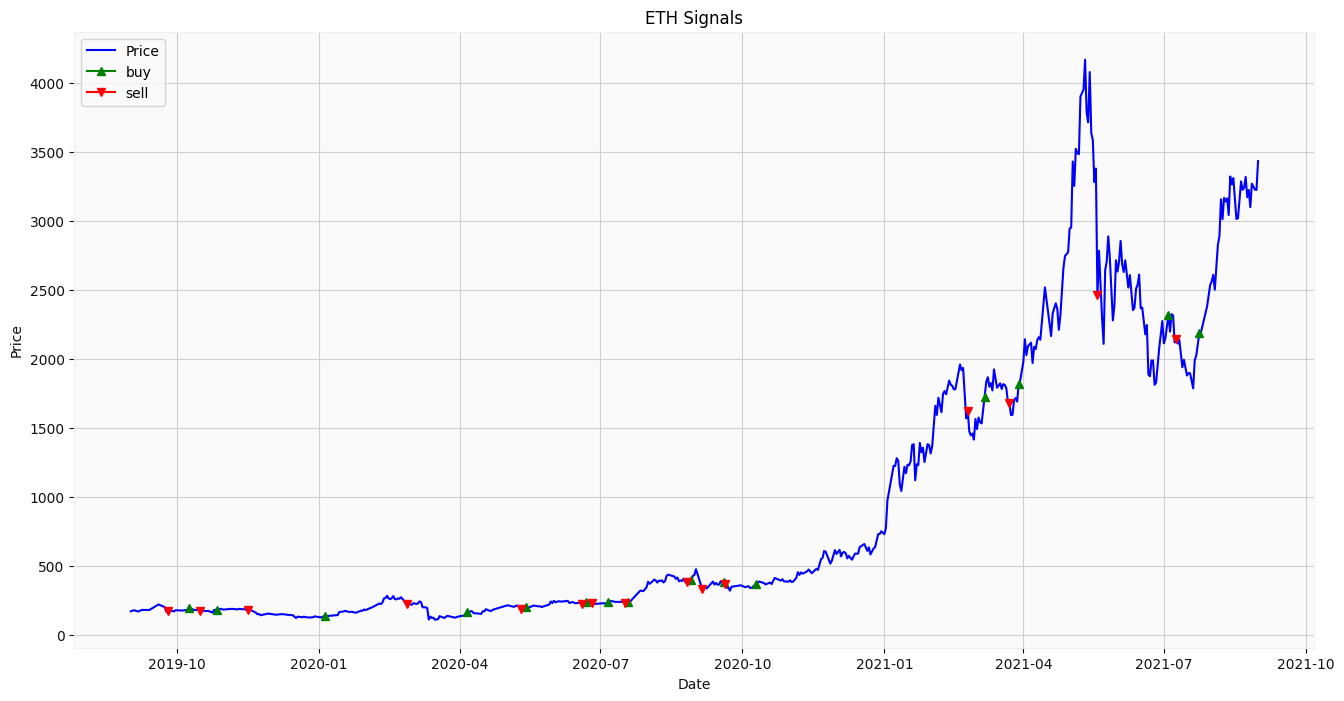

In [ ]:
# Tradin Strategy in Graph
plt.figure(figsize=(16,8))
plt.plot(df['Close'], label='Price', color='blue')
plt.plot(df['buy'], marker='^', color='green', label='buy')
plt.plot(df['sell'], marker='v', color='red', label='sell')
plt.title('ETH Signals')
plt.ylabel('Price')
plt.xlabel('Date')
plt.legend(loc='upper left')
plt.show()


#**Classification Machine Learning Models**

In [ ]:
# Technical Statistics
#EMAs
df['EMA_5'] = ta.trend.ema_indicator(close=df['Close'], window=5, fillna=True)/df['Close']
df['EMA_20'] = ta.trend.ema_indicator(close=df['Close'], window=20, fillna=True)/df['Close']
df['EMA_50'] = ta.trend.ema_indicator(close=df['Close'], window=50, fillna=True)/df['Close']
df['EMA_100'] = ta.trend.ema_indicator(close=df['Close'], window=100, fillna=True)/df['Close']

#RSI
df['RSI'] = ta.momentum.rsi(close=df['Close'], fillna=True)

#ATR
df['ATR'] = ta.volatility.average_true_range(high=df['High'], low=df['Low'], close=df['Close'], fillna=True)

#WR
df['WR'] = ta.momentum.williams_r(high=df['High'], low=df['Low'], close=df['Close'], fillna=True)




In [ ]:
#Target variable
cl = np.array(df['Close'])

target = np.where(cl[1:] > cl[:-1], 1, -1)
df.drop(df.tail(1).index, inplace=True)

df['target'] = target
df.drop(df.head(29).index, inplace=True)
df

,Open,High,Low,Close,Adj Close,Volume,Adj Close t-1,arit_return,log_return,E_price_100,...,EMA_5,signals,buy,sell,EMA_50,EMA_100,RSI,ATR,WR,target
Date,,,,,,,,,,,,,,,,,,,,,
2019-09-30 00:00:00+00:00,170.461349,179.872208,167.036606,179.872208,179.872208,7552915148,170.503479,0.054947,0.053491,104.802663,...,0.981724,0,NaN,NaN,1.011797,0.991137,46.844385,10.322086,-65.407042,-1
2019-10-01 00:00:00+00:00,180.209122,185.045532,175.812653,177.340424,177.340424,7676276225,179.872208,-0.014075,-0.014175,103.327517,...,0.997160,0,NaN,NaN,1.025213,1.005183,45.265635,10.244285,-69.258170,1
2019-10-02 00:00:00+00:00,177.224060,180.826126,175.334274,180.710510,180.710510,6335595250,177.340424,0.019003,0.018825,105.291100,...,0.985709,0,NaN,NaN,1.005854,0.986705,47.788096,9.904826,-64.131889,-1
2019-10-03 00:00:00+00:00,180.703705,180.799210,172.599869,175.199341,175.199341,6381403725,180.710510,-0.030497,-0.030972,102.080014,...,1.011144,0,NaN,NaN,1.036025,1.017392,44.200688,9.783005,-71.972218,1
2019-10-04 00:00:00+00:00,175.238434,178.552078,173.564087,176.985001,176.985001,6248928449,175.199341,0.010192,0.010141,103.120430,...,1.000628,0,NaN,NaN,1.024569,1.006987,45.624984,9.440504,-68.893458,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-08-26 00:00:00+00:00,3228.747314,3249.655273,3060.228760,3100.325439,3100.325439,17405668117,3224.915283,-0.038634,-0.039400,1806.406704,...,1.026443,0,NaN,NaN,0.901998,0.836707,54.019643,181.178303,-65.899581,1
2021-08-27 00:00:00+00:00,3096.406006,3281.840576,3064.485107,3270.600830,3270.600830,18489602004,3100.325439,0.054922,0.053467,1905.617775,...,0.982003,0,NaN,NaN,0.860722,0.797242,59.573910,183.762386,-24.805592,-1
2021-08-28 00:00:00+00:00,3275.104492,3284.845947,3217.403564,3244.403320,3244.403320,13709633698,3270.600830,-0.008010,-0.008042,1890.353778,...,0.993288,0,NaN,NaN,0.872862,0.807567,58.404957,175.453814,-31.128057,-1


In [ ]:
#Dropping buy and sell columns
df.drop(['buy', 'sell'], axis =1, inplace=True)

In [ ]:
# Functions
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Performance Metrics
from sklearn.metrics import plot_roc_curve

#models
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

#Dataset Partittion Between Training and testing
X = df.drop('target', axis=1)
Y = df.target
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, shuffle=False)
print(X_train.shape)
df


(630, 18)


,Open,High,Low,Close,Adj Close,Volume,Adj Close t-1,arit_return,log_return,E_price_100,EMA_20,EMA_5,signals,EMA_50,EMA_100,RSI,ATR,WR,target
Date,,,,,,,,,,,,,,,,,,,
2019-09-30 00:00:00+00:00,170.461349,179.872208,167.036606,179.872208,179.872208,7552915148,170.503479,0.054947,0.053491,104.802663,1.026160,0.981724,0,1.011797,0.991137,46.844385,10.322086,-65.407042,-1
2019-10-01 00:00:00+00:00,180.209122,185.045532,175.812653,177.340424,177.340424,7676276225,179.872208,-0.014075,-0.014175,103.327517,1.036923,0.997160,0,1.025213,1.005183,45.265635,10.244285,-69.258170,1
2019-10-02 00:00:00+00:00,177.224060,180.826126,175.334274,180.710510,180.710510,6335595250,177.340424,0.019003,0.018825,105.291100,1.015911,0.985709,0,1.005854,0.986705,47.788096,9.904826,-64.131889,-1
2019-10-03 00:00:00+00:00,180.703705,180.799210,172.599869,175.199341,175.199341,6381403725,180.710510,-0.030497,-0.030972,102.080014,1.043309,1.011144,0,1.036025,1.017392,44.200688,9.783005,-71.972218,1
2019-10-04 00:00:00+00:00,175.238434,178.552078,173.564087,176.985001,176.985001,6248928449,175.199341,0.010192,0.010141,103.120430,1.029661,1.000628,0,1.024569,1.006987,45.624984,9.440504,-68.893458,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-08-26 00:00:00+00:00,3228.747314,3249.655273,3060.228760,3100.325439,3100.325439,17405668117,3224.915283,-0.038634,-0.039400,1806.406704,0.995196,1.026443,0,0.901998,0.836707,54.019643,181.178303,-65.899581,1
2021-08-27 00:00:00+00:00,3096.406006,3281.840576,3064.485107,3270.600830,3270.600830,18489602004,3100.325439,0.054922,0.053467,1905.617775,0.948776,0.982003,0,0.860722,0.797242,59.573910,183.762386,-24.805592,-1
2021-08-28 00:00:00+00:00,3275.104492,3284.845947,3217.403564,3244.403320,3244.403320,13709633698,3270.600830,-0.008010,-0.008042,1890.353778,0.960586,0.993288,0,0.872862,0.807567,58.404957,175.453814,-31.128057,-1


In [ ]:
# Standarizing X Data
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.fit_transform(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


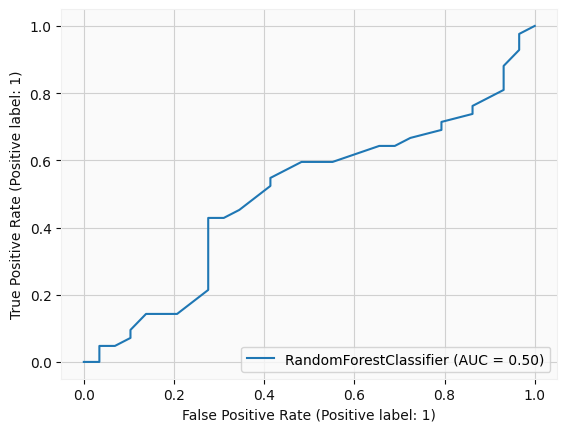

In [ ]:
# Implementing Random Forest Model
rfc = RandomForestClassifier(random_state=1)
rfc = rfc.fit(X_train, Y_train)
plot_roc_curve(rfc, X_test, Y_test)
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


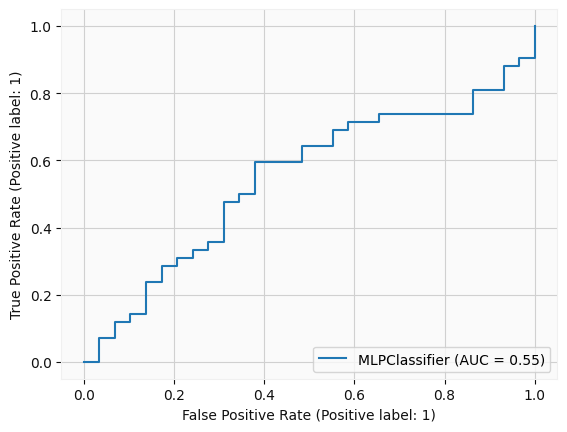

In [ ]:
# Implementing neural network model

mlp = MLPClassifier(solver='adam', hidden_layer_sizes=(64,32), max_iter=1000)
mlp = mlp.fit(X_train, Y_train)
plot_roc_curve(mlp, X_test, Y_test)
plt.show()